In [ ]:
!pip install ucimlrepo

In [16]:
import pandas as pd 
import numpy as numpy
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo
df = pd.read_csv(r"/Users/anusreereddysama/Desktop/TECHWORKS/ml/week15/embedded_system_network_security_dataset.csv")
df.head()

features=df.drop(columns='label')

In [17]:
features.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,True,False,False,True,False,False,False,True,False


In [18]:
df.isnull().sum()

packet_size              0
inter_arrival_time       0
src_port                 0
dst_port                 0
packet_count_5s          0
mean_packet_size         0
spectral_entropy         0
frequency_band_energy    0
label                    0
protocol_type_TCP        0
protocol_type_UDP        0
src_ip_192.168.1.2       0
src_ip_192.168.1.3       0
dst_ip_192.168.1.5       0
dst_ip_192.168.1.6       0
tcp_flags_FIN            0
tcp_flags_SYN            0
tcp_flags_SYN-ACK        0
dtype: int64

In [ ]:
for col in features.columns:
    if features[col].dtype=='bool':
        features[col]=features[col].astype(int)


In [20]:
df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,0,1,1,0,0,0,0,0,0
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,0,1,0,0,0,1,0,1,0
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,0,1,0,0,1,0,0,0,0
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,0,0,0,1,0,0,0,0,0
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,1,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

In [24]:
scaled_features_df=pd.DataFrame(scaled_features,columns=features.columns)
scaled_features_df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049


In [37]:
n_estimators=100
contamination=0.04
sample_size=256
model=IsolationForest(n_estimators=n_estimators,contamination=contamination,max_samples=sample_size,random_state=42)
model.fit(scaled_features)
anomaly_labels=model.predict(scaled_features)
anomaly_labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [44]:
scaled_features_df['anamoly']=anomaly_labels
scaled_features_df

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK,anamoly
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049,1
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049,1
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049,1
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049,1
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.377222,-1.545350,-0.301952,1.351370,-0.258267,0.0,-0.533299,-0.282583,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,1.804250,-0.585049,1
996,0.779181,-1.649024,0.958445,-0.665426,1.391247,0.0,-1.367581,-0.225653,-0.671847,-0.741881,-0.679697,1.399493,1.402626,-0.722544,-0.57889,-0.554247,1.709260,1
997,1.555685,0.781801,1.160481,-0.665426,1.391247,0.0,-1.633794,-0.150013,-0.671847,1.347925,-0.679697,1.399493,1.402626,-0.722544,-0.57889,-0.554247,-0.585049,1
998,-0.620503,0.511317,-0.797856,-0.815436,-1.436491,0.0,1.339950,1.085645,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,1.383999,-0.57889,-0.554247,1.709260,1


In [45]:
scaled_features_df['anamoly'].value_counts()

anamoly
 1    960
-1     40
Name: count, dtype: int64

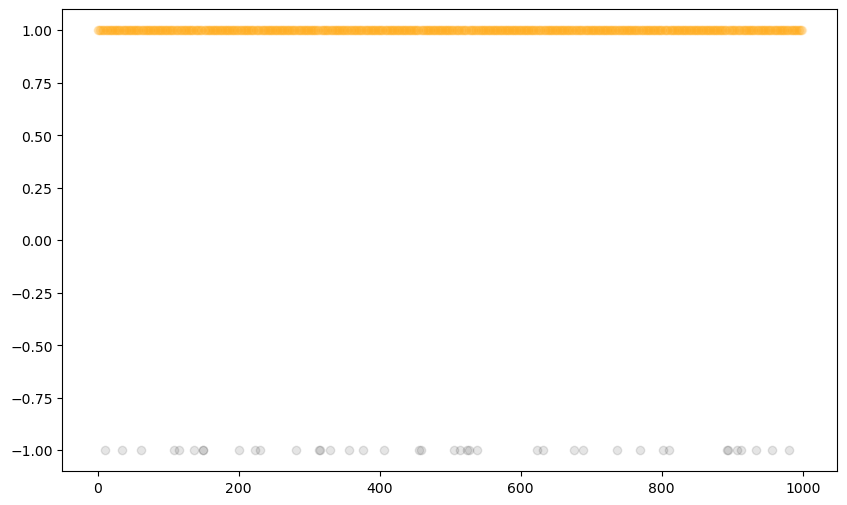

In [47]:
plt.figure(figsize=(10,6))

normal=scaled_features_df[scaled_features_df['anamoly']==1]
anomaly=scaled_features_df[scaled_features_df['anamoly']==-1]
plt.scatter(normal.index,normal['anamoly'],color='orange',label='Normal',alpha=0.1)
plt.scatter(anomaly.index,anomaly['anamoly'],color='black',label='Normal',alpha=0.1)

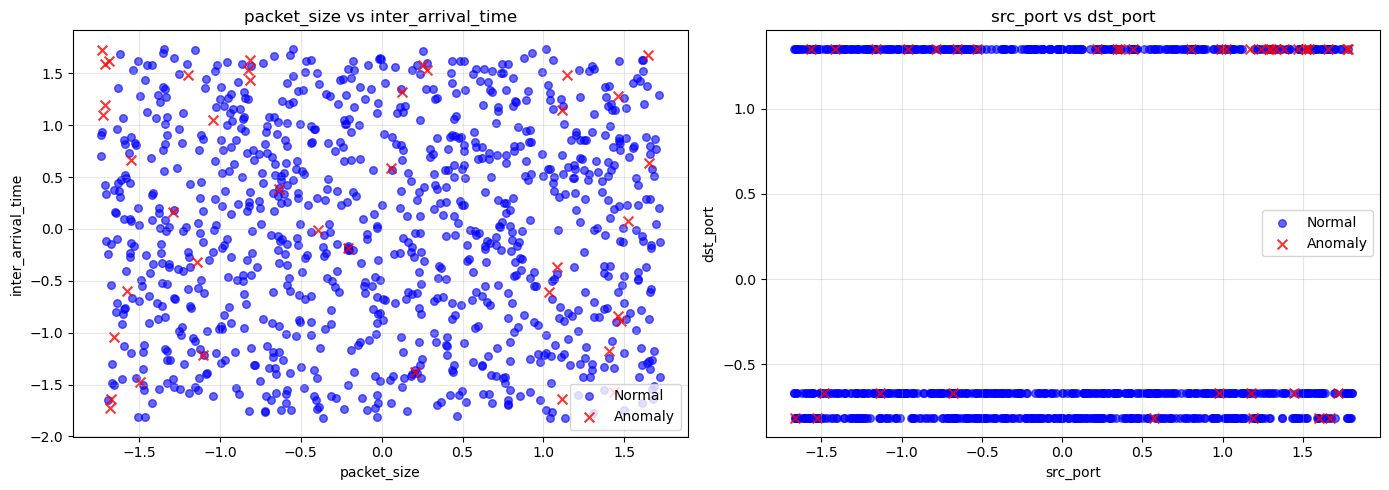

Normal data points: 960
Anomalies detected: 40


In [48]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
 
# Plot 1: CO vs C6H6
axes[0].scatter(normal['packet_size'], normal['inter_arrival_time'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['packet_size'], anomaly['inter_arrival_time'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('packet_size')
axes[0].set_ylabel('inter_arrival_time')
axes[0].set_title('packet_size vs inter_arrival_time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
 
# Plot 2: NOx vs NO2
axes[1].scatter(normal['src_port'], normal['dst_port'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['src_port'], anomaly['dst_port'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel('src_port')
axes[1].set_ylabel('dst_port')
axes[1].set_title('src_port vs dst_port')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
 
plt.tight_layout()
plt.show()
 
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")